# Dataset

1. train.csv: A full training dataset with the following attributes:
2. id: unique id for a news article
3. title: the title of a news article
4. author: author of the news article
5. text: the text of the article; could be incomplete
6. label: a label that marks the article as potentially unreliable.
Where 1: unreliable and 0: reliable.

# Contents


# Importing important libraries

In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Reading dataset

In [40]:
Train = pd.read_csv("../input/fake-news-data/kaggle_fake_train.csv")


In [41]:
# here we are printing first five lines of our train dataset
Train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Pre-Processing

In [42]:
# here we are Getting the Independent Features
X=Train.drop('label',axis=1)

In [43]:
# printing head of our independent features
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [44]:
# here we are printing shape of our dataset
Train.shape


(20800, 5)

In [45]:
# here we are checking if there is null value or not
Train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [46]:
# here we are droping NaN values from our dataset
Train=Train.dropna()

In [47]:
# here we are checking again if there is any NaN value or not
Train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [48]:
Train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


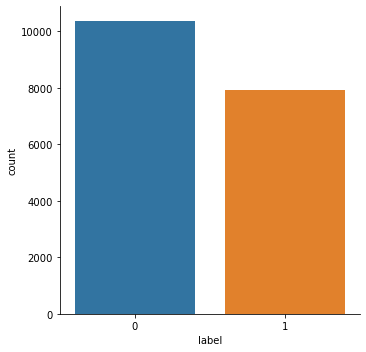

In [49]:
import seaborn as sns
sns.catplot('label', data=Train, kind='count')


In [50]:
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [51]:
import plotly

In [52]:
labels = ['0',' 1']
values = [
      len(Train[(Train["label"] == 0)]), 
      len(Train[(Train["label"] == 1)]), 
]
colors = ['#FEBFBB', '#E13966']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

plotly.offline.iplot([trace], filename='styled_pie_chart')

as above we are observing that after removing NaN values index number 6 and number 8 is missing because they are NaN value so they are get removed so for managing index we have to do index reseting

In [53]:
# here we are copying our dataset .
Train=Train.copy()

In [54]:
# here we are reseting our index
Train.reset_index(inplace=True)

In [55]:
# here we are printing our first 10 line of dataset for checking indexing
Train.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [56]:
x=Train['title']
# here we are making independent features
y=Train['label']
y.shape

(18285,)

In [57]:
# here we are importing nltk,stopwords and porterstemmer we are using stemming on the text 
# we have and stopwords will help in removing the stopwords in the text

#re is regular expressions used for identifying only words in the text and ignoring anything else
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [58]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(Train)):
    review = re.sub('[^a-zA-Z]', ' ', Train['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [59]:
corpus[30]

'russia move ban jehovah wit extremist new york time'

In [60]:
# here we are setting vocabulary size
voc_size=5000

In [61]:
# here we are performing one hot representation
from tensorflow.keras.preprocessing.text import one_hot
one_hot_rep=[one_hot(words,voc_size)for words in corpus] 

In [62]:
# here we are printing length of first line
len(one_hot_rep[0])

10

In [63]:
# here we are printing length of 70 line
len(one_hot_rep[70])

9

In [64]:
# here we are importing library for doind padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
# here we are specifying a sentence length so that every sentence in the corpus will be of same length

sentence_length=25

# here we are using padding for creating equal length sentences


embedded_docs=pad_sequences(one_hot_rep,padding='pre',maxlen=sentence_length)
print(embedded_docs)

[[   0    0    0 ... 4728 3694 2569]
 [   0    0    0 ... 3954 3883  119]
 [   0    0    0 ... 3271 2439 1718]
 ...
 [   0    0    0 ... 4589 3474  564]
 [   0    0    0 ... 3897 1930 1018]
 [   0    0    0 ...  907 4061 2901]]


# Building Models

In [65]:
z =np.array(embedded_docs)
y =np.array(y)

In [66]:
# here we are printing shape 
z.shape,y.shape

((18285, 25), (18285,))

# Spiliting and Training

In [67]:
# here we are splitting the data for training and testing the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.10, random_state=42)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(x_train))}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Bagging Classifier

In [69]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(n_estimators=10, random_state=42)
bagging_clf.fit(x_train, y_train)

BaggingClassifier(random_state=42)

In [70]:
print_score(bagging_clf, x_train, y_train, x_test, y_test, train=True)
print_score(bagging_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
accuracy score: 0.9956

Classification Report: 
 	Precision: 0.9919152495121272
	Recall Score: 0.997896508203618
	F1 score: 0.9948968891995805

Confusion Matrix: 
 [[9267   58]
 [  15 7116]]

Test Result:
accuracy score: 0.8698742482230727

Classification Report: 
 	Precision: 0.8059536934950385
	Recall Score: 0.9218158890290038
	F1 score: 0.8600000000000001

Confusion Matrix: 
 [[860 176]
 [ 62 731]]



# Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(random_state=42, n_estimators=1000)
rand_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [72]:
print_score(rand_forest, x_train, y_train, x_test, y_test, train=True)
print_score(rand_forest, x_train, y_train, x_test, y_test, train=False)

Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[9325    0]
 [   0 7131]]

Test Result:
accuracy score: 0.8851831601968289

Classification Report: 
 	Precision: 0.7935548841893253
	Recall Score: 0.9936948297604036
	F1 score: 0.8824188129899216

Confusion Matrix: 
 [[831 205]
 [  5 788]]



# Boosting Algorithms

AdaBoost

Stochastic Gradient Boosting

In [73]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [74]:
print_score(ada_boost_clf, x_train, y_train, x_test, y_test, train=True)
print_score(ada_boost_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
accuracy score: 0.8963

Classification Report: 
 	Precision: 0.8139615651771244
	Recall Score: 0.9859767213574534
	F1 score: 0.8917496353605174

Confusion Matrix: 
 [[7718 1607]
 [ 100 7031]]

Test Result:
accuracy score: 0.8813559322033898

Classification Report: 
 	Precision: 0.7926829268292683
	Recall Score: 0.9836065573770492
	F1 score: 0.8778840742824986

Confusion Matrix: 
 [[832 204]
 [ 13 780]]



# Stochastic Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [76]:
print_score(grad_boost_clf, x_train, y_train, x_test, y_test, train=True)
print_score(grad_boost_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
accuracy score: 0.9020

Classification Report: 
 	Precision: 0.8167623421354765
	Recall Score: 0.9976160426307671
	F1 score: 0.8981756202259958

Confusion Matrix: 
 [[7729 1596]
 [  17 7114]]

Test Result:
accuracy score: 0.8868234007654456

Classification Report: 
 	Precision: 0.7935871743486974
	Recall Score: 0.9987389659520807
	F1 score: 0.8844221105527638

Confusion Matrix: 
 [[830 206]
 [  1 792]]

